In this assignment you can identify a dataset of your interest and perform exploratory data analysis to better understand the data, investigate initial questions about it and develop preliminary insights and hypotheses. Your final submission will be a blog post consisting of a series of captioned visualizations that convey the key insights gained over the course of your analysis. You need to post the blog to medium or your github website.

Documenting the data analysis process you went through is the main pedagogical goal of the assignment and more important than the design of the final visualization.

We will go over the details of the project during class hours next week.

##**Part 1: Select and Prepare the Data**

You should start by picking a topic area of interest to you and finding a dataset that can provide insights into that topic. We have provided some datasets below that you can start from. But we encourage you to investigate a different topic and dataset. If you self-select a dataset and are concerned about its appropriateness for the assignment, you can check with the TAs regarding the same.

**Note:** The data collection and preparation (also known as data wrangling) can be a very tedious and time-consuming process. Be sure you have sufficient time to conduct exploratory analysis, after preparing the data.

After selecting a topic and dataset – but prior to analysis – you should write down an initial set of at least three questions you’d like to investigate.

## **Part 2: Exploratory Analysis**

Once you have picked the dataset and performed the initial data wrangling, you will perform exploratory analysis to investigate your data. For this assignment we would like you to use Pandas, NumPy and matplotlib to help you with the analysis. 

**Phase 1:** You should start the exploration by first examining the shape and structure of your data. What dimensions/variables does it contain and how are the data values distributed? Are there any notable data quality issues? Find out if there are missing values in the data and think of how you can handle them. Are there any surprising relationships between the dimensions/variables? Make sure to perform sanity checks for patterns you expect to see! Note that it may be the case that after doing a bit of exploration in phase 1 you find that your data is not as interesting as you first thought. In such cases you might consider returning to Part 1 and identifying a different dataset to work with. Such iteration on choosing the dataset is common, but also time-consuming, so make sure you leave time in your schedule for this.

**Phase 2:** Next, you should investigate your initial questions, as well as any new questions that arise during your exploration. For each question, create a visualization that might provide a useful answer. Then refine the visualization (by adding additional variables, changing the sort ordering or axis scales, filtering or subsetting data, etc.) to develop better perspectives explore unexpected observations, or sanity check your assumptions. You should repeat this process for each of your questions, and also feel free to revise your questions or branch off to explore new questions as the data warrants.

## **Final Deliverable**

Your final submission should take the form of a blog post that consists of 10 or more captioned visualizations detailing your most important insights. You will also work on posting the blog to medium or your github website. Your “insights” can include important surprises or issues (such as data quality problems affecting your analysis) as well as responses to your analysis questions.

Each visualization image should be a screenshot accompanied with a title and descriptive caption (1-4 sentences long) describing the insight(s) learned from that view. Provide sufficient detail for each caption such that anyone could read through your report and understand what you’ve learned. You are free, but not required, to annotate your images to draw attention to specific features of the data. 

Do not submit a blog cluttered with everything little thing you tried. Submit a clean report that highlights the most important “milestones” in your exploration, which can include initial overviews, identification of data quality problems, confirmations of key assumptions, and potential “discoveries”. Your blog should only present the final dataset you analyzed and should not describe any iterations on earlier datasets you might have initially explored.

## **Data Sources**

There are a variety of data sources available online. Here are some possible sources to consider. If you have any questions about whether your dataset is appropriate, please talk to the TAs.

**Data is Plural** - Variety of datasets and sources covering many topics.

https://data.gov - U.S. Government open datasets.

U.S. Census Bureau - Census data - https://data.census.gov/

Federal Elections Commission - Campaign finance and expenditures. - https://www.fec.gov/data/

Federal Aviation Administration - FAA data - https://www.faa.gov/data_research/

https://www.kaggle.com/

https://archive.ics.uci.edu/ml/index.php

https://github.com/awesomedata/awesome-public-datasets - Awesome Public Datasets - Variety of public datasets.

Stanford Cable TV News Analyzer - We have recently released a tool that can be used to analyze who and what appears in the last decade of Cable TV News (i.e. CNN, Fox News, MSNBC). The site lets you download data as well which you could use to conduct further analysis. - https://tvnews.stanford.edu/data

### **Visualization Tool (matplotlib, seaborn, etc)**

One goal of this assignment is for you to learn to use and evaluate the effectiveness of these packages. In addition to these packages, you are free to also use other visualization tools as you see fit, for example, you could also take a look at Tableau.

### **Data Wrangling Tools**

The data you choose may require reformatting, transformation or cleaning prior to visualization. You can use Pandas for data preparation. 

### **Grading**

Each submission will be graded based on both the analysis process and the included visualizations. Here are our grading criteria:

**Appropriate Data Assessment (5):** Overview/understanding of the data is built from transformations and appropriate assessment of data quality. Poses clear questions.

**Exploration Thoroughness (5):** Sufficient breadth of analysis, exploring questions in sufficient depth (with appropriate follow-up questions).

**Documentation (Blog) (5):** Clear documentation of exploratory process, including clearly written, understandable captions that communicate primary insights.

**Appropriate use of Numpy, Pandas, and Matplotlib (5)**  to ingest, clean, and present the data

### **Submission Details**

This is an individual assignment. You may not work in groups. The assignment is due on Friday (03/05/2021)

To submit your assignment, download your notebook and zip all the necessary files(data files). Submit the zipped file to balckboard. Make sure the notebook and the zipped file is named in the format - EDA_LastName_FirstName. Be sure to include the link to access your blog in your notebook.

Also include the link to your notebook in the submission. 

We will provide more details on the blog during the next week of class.

**Note** - If the dataset is too large to be zipped and submitted on blackboard, only submit your notebook, add your dataset to your google drive and share a link to the file in your notebook.

In [1]:
#import libraries
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
# *Data Preparation Steps*

#3 seasons worth of Premier League data for each game. 380 games per season
url1718 = 'https://www.football-data.co.uk/mmz4281/1718/E0.csv'
url1819 = 'https://www.football-data.co.uk/mmz4281/1819/E0.csv'
url1920 = 'https://www.football-data.co.uk/mmz4281/1920/E0.csv'

#There were up to 120 columns depending on the season. I selected only game statistics columns without importing the majority, which are various betting odds
columns = ['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','Referee','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']
#combine URLs into list
seasons = [url1718, url1819, url1920]

#combine the three CSV files
listSeasons = []
for s in seasons:
  frame = pd.read_csv(s, usecols= columns, header= 0)
  listSeasons.append(frame)

df = pd.concat(listSeasons, ignore_index = True)

#convert date strings to datetime
df.Date = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,2017-08-11,Arsenal,Leicester,4,3,H,2,2,D,M Dean,27,6,10,3,9,12,9,4,0,1,0,0
1,2017-08-12,Brighton,Man City,0,2,A,0,0,D,M Oliver,6,14,2,4,6,9,3,10,0,2,0,0
2,2017-08-12,Chelsea,Burnley,2,3,A,0,3,A,C Pawson,19,10,6,5,16,11,8,5,3,3,2,0
3,2017-08-12,Crystal Palace,Huddersfield,0,3,A,0,2,A,J Moss,14,8,4,6,7,19,12,9,1,3,0,0
4,2017-08-12,Everton,Stoke,1,0,H,1,0,H,N Swarbrick,9,9,4,1,13,10,6,7,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,2020-07-26,Leicester,Man United,0,2,A,0,0,D,M Atkinson,14,7,3,3,12,11,3,3,1,4,1,0
1136,2020-07-26,Man City,Norwich,5,0,H,2,0,H,C Pawson,31,5,10,4,7,4,9,0,1,1,0,0
1137,2020-07-26,Newcastle,Liverpool,1,3,A,1,1,D,A Taylor,3,14,2,6,11,5,2,4,1,0,0,0
1138,2020-07-26,Southampton,Sheffield United,3,1,H,0,1,A,P Bankes,13,5,4,3,9,16,9,1,0,1,0,0


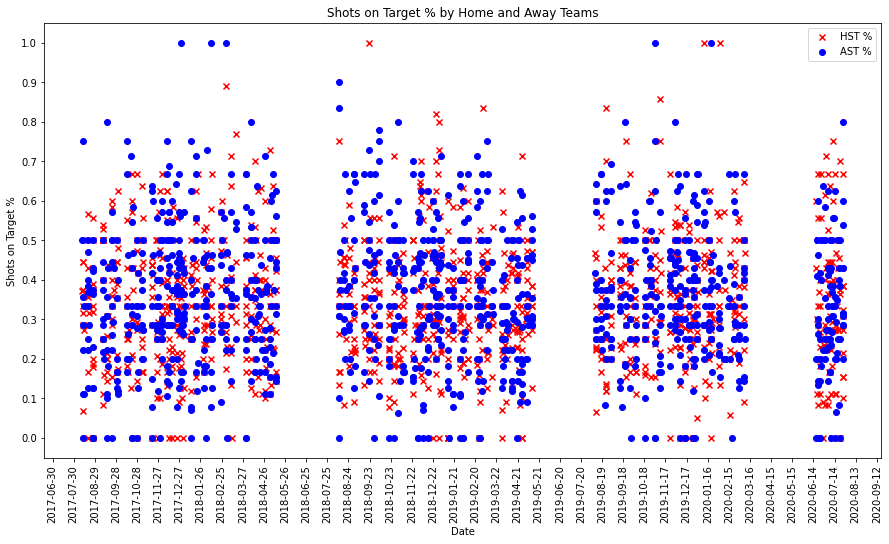

In [3]:
#1. Are home teams more clinical in front of goal (higher percentage of shots being on target) than away teams?

dfQ1 = df[['Date','HS',"AS","HST", "AST"]]
frameQ1 = dfQ1.rename({'HS':'Home Shots', 'AS': 'Away Shots', 'HST': 'Home Shots on Target', 'AST': 'Away Shots on Target'}, axis=1, inplace=False)


#create columns for shots on target percentage for home and away teams
frameQ1['Home ST %'] = frameQ1['Home Shots on Target']/frameQ1['Home Shots']
frameQ1['Away ST %'] = frameQ1['Away Shots on Target']/frameQ1['Away Shots']

#set figure big enough to accomodate plot
f = plt.figure() 
f.set_figwidth(15) 
f.set_figheight(8) 

#plot percentages on scatterplot with date as x variable
plt.scatter(frameQ1['Date'], frameQ1['Home ST %'], marker ='x', color = 'r', label='HST %')
plt.scatter(frameQ1['Date'], frameQ1['Away ST %'], marker ='o', color = 'b', label='AST %')

#Plot labeling
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
plt.legend(loc='best')
plt.title('Shots on Target % by Home and Away Teams')
plt.xlabel('Date')
plt.ylabel('Shots on Target %')
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xticks(rotation = 90)
plt.show()



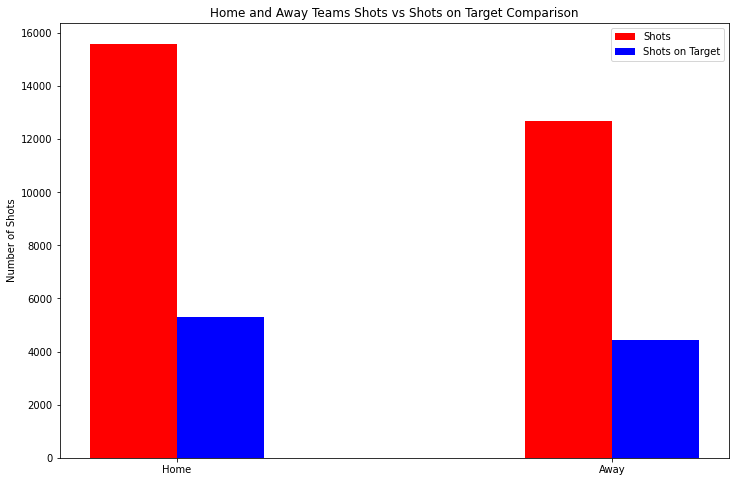

In [4]:
#1-1 Since shots on target % does not really differ between home and away teams, do the number of shots and shots on target differ between home and away teams?

#initiate counting variables
homeS = 0
awayS = 0
homeSOT = 0
awaySOT = 0

#use .index to loop through home and away fixtures
for i in frameQ1.index:
  homeS += (frameQ1['Home Shots'][i])
  awayS += (frameQ1['Away Shots'][i])
  homeSOT += (frameQ1['Home Shots on Target'][i])
  awaySOT += (frameQ1['Away Shots on Target'][i])

#set figure big enough to accomodate plot
f = plt.figure() 
f.set_figwidth(12) 
f.set_figheight(8) 

#number of groupings of bars wanted and width of each bar
numberBars = 2
widthOfBar = 0.2

#values of shots and shots on target for home and away teams
shotsBar = (homeS, awayS)
SOTBar = (homeSOT, awaySOT)

#positioning of groupings of bars
ind = np.arange(numberBars)

#plotting side by side bar charts
plt.bar(ind, shotsBar, widthOfBar, label="Shots", color='r')
plt.bar(ind+ widthOfBar, SOTBar, widthOfBar, label="Shots on Target", color='b')


#plot labels and titles
plt.xticks((ind + widthOfBar/2), ('Home', 'Away'))
plt.ylabel('Number of Shots')
# plt.yticks(np.arange(0,homeS + 1,1))
plt.title('Home and Away Teams Shots vs Shots on Target Comparison')
plt.legend(loc='best')

plt.show()

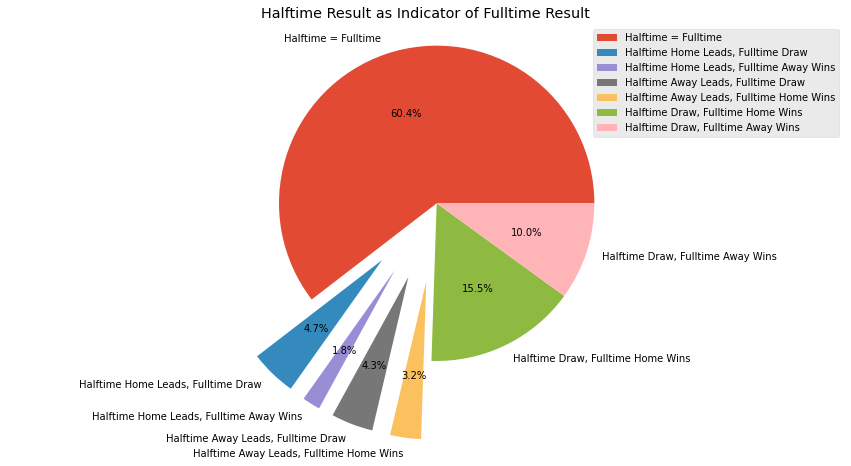

In [14]:
#2 How often do half time results translate to full time results?

#select needed columns from dataset
dfQ2 = df[['Date','HomeTeam','AwayTeam','HTR','FTR']]
frameQ2 = dfQ2.rename({'HTR':'Halftime Result', 'FTR': 'Fulltime Result'}, axis=1, inplace=False)

#count the instances of possible permutation of halftime to fulltime results
halfFullSame = 0
halfHomeLeadFullDraw = 0
halfHomeLeadFullAway = 0
halfAwayLeadFullDraw = 0
halfAwayLeadFullHome = 0
halfDrawFullHome = 0
halfDrawFullAway = 0
for index, row in frameQ2.iterrows():
  if row['Halftime Result'] == row['Fulltime Result']:
    halfFullSame += 1
  elif row['Halftime Result'] == "H" and row['Fulltime Result'] == "D":
    halfHomeLeadFullDraw += 1
  elif row['Halftime Result'] == "H" and row['Fulltime Result'] == "A":
    halfHomeLeadFullAway += 1
  elif row['Halftime Result'] == "A" and row['Fulltime Result'] == "D":
    halfAwayLeadFullDraw += 1
  elif row['Halftime Result'] == "A" and row['Fulltime Result'] == "H":
    halfAwayLeadFullHome += 1
  elif row['Halftime Result'] == "D" and row['Fulltime Result'] == "H":
    halfDrawFullHome += 1
  elif row['Halftime Result'] == "D" and row['Fulltime Result'] == "A":
    halfDrawFullAway += 1

#set figure big enough to accomodate plot
f = plt.figure() 
f.set_figwidth(15) 
f.set_figheight(8) 

#create pie chart, explode small slices
resultsQ2 = ['Halftime = Fulltime', 'Halftime Home Leads, Fulltime Draw', 'Halftime Home Leads, Fulltime Away Wins', 'Halftime Away Leads, Fulltime Draw',
          'Halftime Away Leads, Fulltime Home Wins', 'Halftime Draw, Fulltime Home Wins', 'Halftime Draw, Fulltime Away Wins']
occurencesQ2 = [halfFullSame, halfHomeLeadFullDraw, halfHomeLeadFullAway, halfAwayLeadFullDraw, halfAwayLeadFullHome, halfDrawFullHome, halfDrawFullAway]

plt.pie(occurencesQ2, labels=resultsQ2, autopct='%.1f%%', startangle=0,
        explode=[0, 0.5, 0.5, 0.5, 0.5, 0, 0])

#plot labels
plt.title('Halftime Result as Indicator of Fulltime Result')
plt.legend(resultsQ2, loc='upper right')
plt.axis('equal')
plt.show()


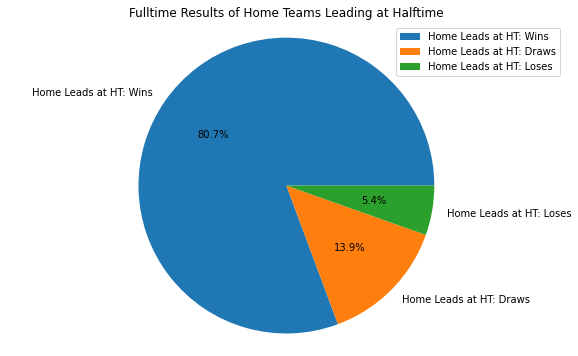

In [6]:
#3 Following up from Q2, how likely are home teams leading at half time to win?

#select needed columns from dataset
dfQ3 = df[['Date','HomeTeam','AwayTeam','HTHG', 'HTAG','FTR']]
frameQ3 = dfQ3.rename({'HTHG':'Halftime Home Goals', 'HTAG':'Halftime Away Goals', 'FTR': 'Fulltime Result'}, axis=1, inplace=False)

homeGoodResult = 0
homeBadResult = 0
homeEmbarrasingResult = 0
for index, row in frameQ3.iterrows():
  if row['Halftime Home Goals'] > row['Halftime Away Goals'] and row['Fulltime Result'] == "H":
    homeGoodResult += 1
  elif row['Halftime Home Goals'] > row['Halftime Away Goals'] and row['Fulltime Result'] == "D":
    homeBadResult += 1
  elif row['Halftime Home Goals'] > row['Halftime Away Goals'] and row['Fulltime Result'] == "A":
    homeEmbarrasingResult += 1


#set figure big enough to accomodate plot
f = plt.figure() 
f.set_figwidth(10) 
f.set_figheight(6) 

#create pie chart
resultsQ3 = ['Home Leads at HT: Wins', 'Home Leads at HT: Draws', 'Home Leads at HT: Loses']
occurencesQ3 = [homeGoodResult, homeBadResult, homeEmbarrasingResult]

plt.pie(occurencesQ3, labels=resultsQ3, autopct='%.1f%%', startangle=0,
        explode=[0, 0, 0])

#plot labels
plt.title('Fulltime Results of Home Teams Leading at Halftime')
plt.legend(resultsQ3, loc='upper right')
plt.axis('equal')
plt.show()




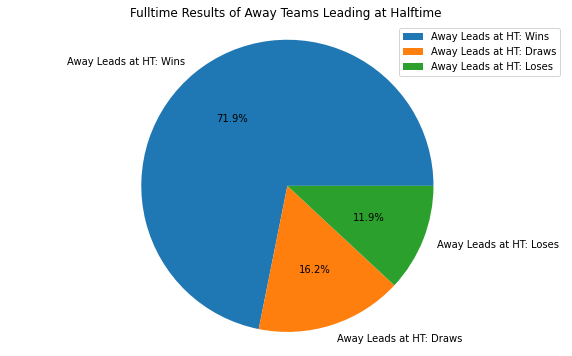

In [7]:
#4 Following up from Q3, how likely are away teams leading at half time to win? Is there a home field comeback advantage?

#select needed columns from dataset
dfQ4 = df[['Date','HomeTeam','AwayTeam','HTHG', 'HTAG','FTR']]
frameQ4 = dfQ4.rename({'HTHG':'Halftime Home Goals', 'HTAG':'Halftime Away Goals', 'FTR': 'Fulltime Result'}, axis=1, inplace=False)

#initiate counting variables
awayExcellentResult = 0
awayOkResult = 0
awaySadResult = 0

#iterate through rows to find all possible permutations of results
for index, row in frameQ4.iterrows():
  if row['Halftime Home Goals'] < row['Halftime Away Goals'] and row['Fulltime Result'] == "A":
    awayExcellentResult += 1
  elif row['Halftime Home Goals'] < row['Halftime Away Goals'] and row['Fulltime Result'] == "D":
    awayOkResult += 1
  elif row['Halftime Home Goals'] < row['Halftime Away Goals'] and row['Fulltime Result'] == "H":
    awaySadResult += 1

#set figure big enough to accomodate plot
f = plt.figure() 
f.set_figwidth(10) 
f.set_figheight(6) 

#create pie chart
resultsQ4 = ['Away Leads at HT: Wins', 'Away Leads at HT: Draws', 'Away Leads at HT: Loses']
occurencesQ4 = [awayExcellentResult, awayOkResult, awaySadResult]

plt.pie(occurencesQ4, labels=resultsQ4, autopct='%.1f%%', startangle=0,
        explode=[0, 0, 0])

#plot labels
plt.title('Fulltime Results of Away Teams Leading at Halftime')
plt.legend(resultsQ4, loc='upper right')
plt.axis('equal')
plt.show()


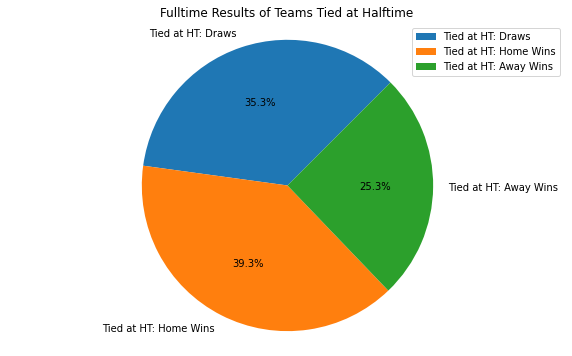

In [8]:
#5 Finally, how likely are teams tied at halftime to win? Is there a home field advantage?

#select needed columns from dataset
dfQ5 = df[['Date','HomeTeam','AwayTeam','HTHG', 'HTAG','FTR']]
frameQ5 = dfQ5.rename({'HTHG':'Halftime Home Goals', 'HTAG':'Halftime Away Goals', 'FTR': 'Fulltime Result'}, axis=1, inplace=False)

#initiate counting variables
neutralResult = 0
homeResult = 0
awayResult = 0

#iterate through rows to find all possible permutations of results
for index, row in frameQ5.iterrows():
  if row['Halftime Home Goals'] == row['Halftime Away Goals'] and row['Fulltime Result'] == "D":
    neutralResult += 1
  elif row['Halftime Home Goals'] == row['Halftime Away Goals'] and row['Fulltime Result'] == "H":
    homeResult += 1
  elif row['Halftime Home Goals'] == row['Halftime Away Goals'] and row['Fulltime Result'] == "A":
    awayResult += 1


#set figure big enough to accomodate plot
f = plt.figure() 
f.set_figwidth(10) 
f.set_figheight(6) 

#create pie chart
resultsQ5 = ['Tied at HT: Draws', 'Tied at HT: Home Wins', 'Tied at HT: Away Wins']
occurencesQ5 = [neutralResult, homeResult, awayResult]

plt.pie(occurencesQ5, labels=resultsQ5, autopct='%.1f%%', startangle=45,
        explode=[0, 0, 0])

#plot labels
plt.title('Fulltime Results of Teams Tied at Halftime')
plt.legend(resultsQ5, loc='upper right')
plt.axis('equal')
plt.show()


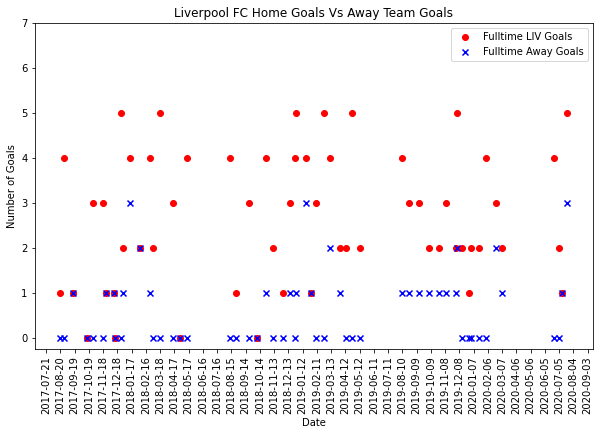

In [9]:
#6 My favorite team, Liverpool FC, went on a 68 game unbeaten run at home from April 2017 to January 2021.
#Since Liverpool was unbeaten at home for the entire duration covered by this dataset, how dominant were Liverpool FC
#against opposing teams when playing at home?

#create dataframe for Liverpool home games in the dataset
livHome = df[df["HomeTeam"] == "Liverpool"]

#create figure
f = plt.figure() 
f.set_figwidth(10) 
f.set_figheight(6) 

#scatter plot full time home goals for Liverpool and away goals for their opponents
plt.scatter(livHome['Date'], livHome['FTHG'], marker ='o', color = 'r', label='Fulltime LIV Goals')
plt.scatter(livHome['Date'], livHome['FTAG'], marker ='x', color = 'b', label='Fulltime Away Goals')

#plot labels
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30)) #30 day intervals to avoid clutter
plt.legend(loc='best')
plt.title('Liverpool FC Home Goals Vs Away Team Goals')
plt.xlabel('Date')
plt.ylabel('Number of Goals')
plt.yticks(np.arange(0, 8, 1))
plt.xticks(rotation = 90)

plt.show()


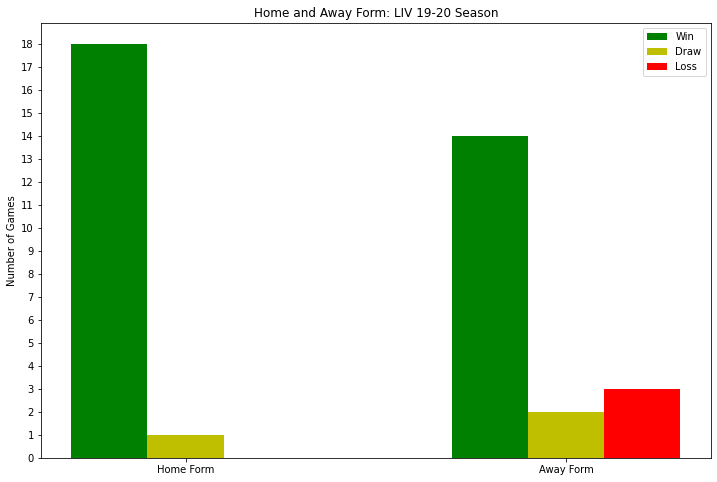

In [10]:
#7 How was Liverpool's home and away form for their title winning season in 19-20?

#create dataframe of Liverpool's 2019-2020 season from dataset. Also create dataframes of Liverpool's home and away fixtures in 2019-2020 season
liv1920 = df[((df['HomeTeam']=="Liverpool")|(df["AwayTeam"]=='Liverpool')) & ((df['Date'] >= '2019-08-09') & (df['Date'] <= '2020-07-26'))]

#home fixtures
liv1920HomeTemp = liv1920[liv1920['HomeTeam']=="Liverpool"]
liv1920Home = liv1920HomeTemp.reset_index()
del liv1920Home["index"]

#away fixtures
liv1920AwayTemp = liv1920[liv1920['AwayTeam']=="Liverpool"]
liv1920Away = liv1920AwayTemp.reset_index()
del liv1920Away["index"]

#initiate counting variables
homeWin = 0
homeDraw = 0
homeLoss = 0
awayWin = 0
awayDraw = 0
awayLoss = 0

#use .index to loop through home and away fixtures
for i in liv1920Home.index:
  #if the index of full time result column is a particular result, add to count of that type of result
  if liv1920Home["FTR"][i] == "H":
    homeWin += 1
  elif liv1920Home["FTR"][i] == "D":
    homeDraw += 1
  elif liv1920Home["FTR"][i] == "A":
    homeLoss += 1

for i in liv1920Away.index:
  if liv1920Away["FTR"][i] == "H":
    awayLoss += 1
  elif liv1920Away["FTR"][i] == "D":
    awayDraw += 1
  elif liv1920Away["FTR"][i] == "A":
    awayWin += 1

#set figure big enough to accomodate plot
f = plt.figure() 
f.set_figwidth(12) 
f.set_figheight(8) 

#number of groupings of bars wanted and width of each bar
numBars = 2
widthBar = 0.2

#values of home and away wins/draws/losses
wins = (homeWin, awayWin)
draws = (homeDraw, awayDraw)
losses = (homeLoss, awayLoss)

#positioning of groupings of bars
ind = np.arange(numBars)

#plotting side by side bar charts
plt.bar(ind, wins, widthBar, label="Win", color='g')
plt.bar(ind+ widthBar, draws, widthBar, label="Draw", color='y')
plt.bar(ind+ widthBar*2, losses, widthBar, label="Loss", color='r')

#plot labels and titles
plt.xticks((ind + widthBar), ('Home Form', 'Away Form'))
plt.ylabel('Number of Games')
plt.yticks(np.arange(0,19,1))
plt.title('Home and Away Form: LIV 19-20 Season')
plt.legend(loc='best')

plt.show()


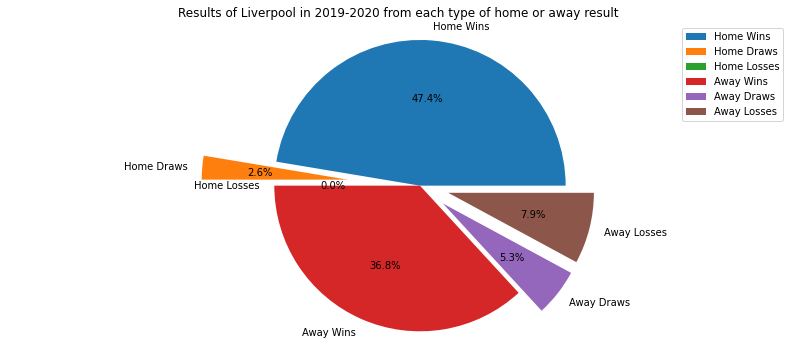

In [11]:
#8 How were Liverpool’s results in 2019–2020 for each type of fixture (home win, away loss, etc.)?

#set figure big enough to accomodate plot
f = plt.figure() 
f.set_figwidth(14) 
f.set_figheight(6) 

#create pie chart
resultsQ8 = ['Home Wins', 'Home Draws', 'Home Losses', 'Away Wins', 'Away Draws', 'Away Losses']
occurencesQ8 = [homeWin, homeDraw, homeLoss, awayWin, awayDraw, awayLoss]

plt.pie(occurencesQ8, labels=resultsQ8, autopct='%.1f%%', startangle=0,
        explode=[0, 0.5, 0, 0, 0.2, 0.2])

#plot labels
plt.title('Results of Liverpool in 2019-2020 from each type of home or away result')
plt.legend(resultsQ8, loc='upper right')
plt.axis('equal')
plt.show()


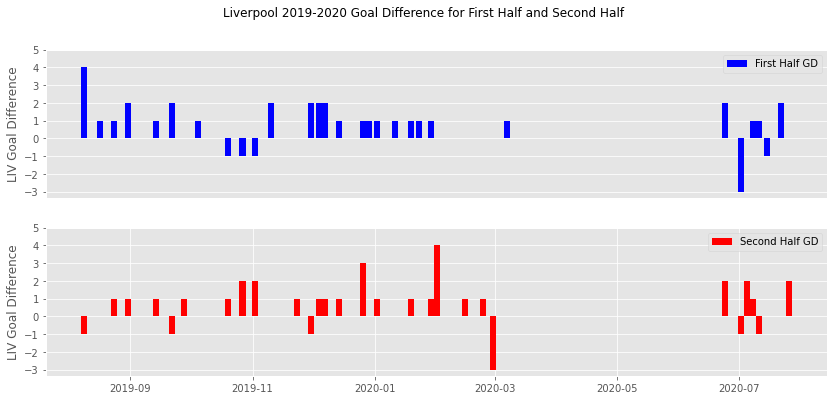

In [12]:
#9 While watching Liverpool games in 2019-2020, it always seemed to me that Liverpool were always leaving it to the second half to secure a win (aka perform better in 2nd half).
#Is my intuition right according to the data?

#create columns for first half goal difference and second half goal difference in home and away fixtures
liv1920Home['First Half Goal Difference'] = liv1920Home['HTHG'] - liv1920Home['HTAG']
liv1920Home['Second Half Goal Difference'] = liv1920Home['FTHG'] - liv1920Home['FTAG'] - liv1920Home['First Half Goal Difference']

liv1920Away['First Half Goal Difference'] = liv1920Away['HTAG'] - liv1920Away['HTHG']
liv1920Away['Second Half Goal Difference'] = liv1920Away['FTAG'] - liv1920Away['FTHG'] - liv1920Away['First Half Goal Difference']

#create subplots
plt.style.use('ggplot')
fig, ((ax1, ax2)) = plt.subplots(2, 1)
fig.set_figwidth(14) 
fig.set_figheight(6)

#set bar width
wid = 3

#stacked bar graph on the same plot using home and away data
ax1.bar(liv1920Home['Date'],liv1920Home['First Half Goal Difference'], width=wid, color = 'blue', label= 'First Half GD')
ax2.bar(liv1920Home['Date'],liv1920Home['Second Half Goal Difference'], width=wid, color = 'red',  label= 'Second Half GD')
ax1.bar(liv1920Away['Date'],liv1920Away['First Half Goal Difference'], width=wid, color = 'blue')
ax2.bar(liv1920Away['Date'],liv1920Away['Second Half Goal Difference'], width=wid, color = 'red')


#plot labels and titles
fig.suptitle('Liverpool 2019-2020 Goal Difference for First Half and Second Half')
ax1.set_ylabel('LIV Goal Difference')
ax1.set_xticks([])
ax1.set_yticks(np.arange(-3, 6, 1))
ax1.legend(loc="best")

ax2.set_ylabel('LIV Goal Difference')
ax2.set_yticks(np.arange(-3, 6, 1))
ax2.legend(loc="best")

plt.show()

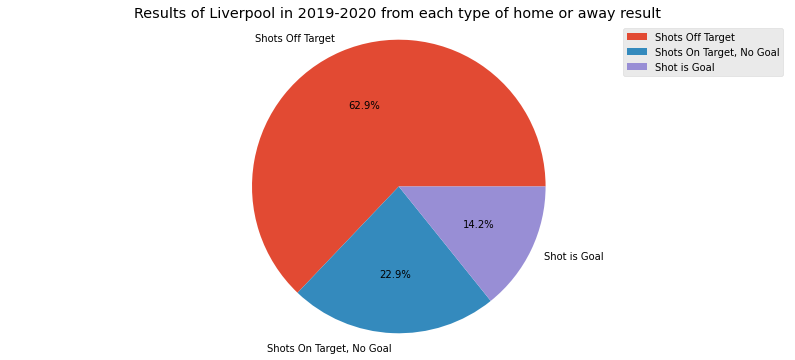

In [13]:
#10 For Liverpool in 2019–2020, how often are shots taken accurate (shot on goal) and become goals?

#initiate counting variables
homeShots = 0
homeShotsOnTarget = 0
homeGoals = 0
awayShots = 0
awayShotsOnTarget = 0
awayGoals = 0

#use .index to loop through home and away fixtures
for i in liv1920Home.index:
  homeShots += (liv1920Home['HS'][i])
  homeShotsOnTarget += (liv1920Home['HST'][i])
  homeGoals += (liv1920Home['FTHG'][i])

for i in liv1920Away.index:
  awayShots += (liv1920Away['HS'][i])
  awayShotsOnTarget += (liv1920Away['HST'][i])
  awayGoals += (liv1920Away['FTHG'][i])

#add results from home and away fixtures
totalShots = homeShots + awayShots
totalShotsOnTarget = homeShotsOnTarget + awayShotsOnTarget
totalGoals = homeGoals + awayGoals

#find total shots off target and shots on target that were saved
totalSOTNoGoal = totalShotsOnTarget - totalGoals
totalShotsOffTarget = totalShots - totalShotsOnTarget

#set figure big enough to accomodate plot
f = plt.figure() 
f.set_figwidth(14) 
f.set_figheight(6) 

#create pie chart
resultsQ10 = ['Shots Off Target', 'Shots On Target, No Goal', 'Shot is Goal']
occurencesQ10 = [totalShotsOffTarget, totalSOTNoGoal, totalGoals]

plt.pie(occurencesQ10, labels=resultsQ10, autopct='%.1f%%', startangle=0,
        explode=[0, 0, 0])

#plot labels
plt.title('Results of Liverpool in 2019-2020 from each type of home or away result')
plt.legend(resultsQ10, loc='upper right')
plt.axis('equal')

plt.show()
